# GOAL OF THE PROJECT

The Data set is the actually a survey which was taken from students at FSEV UK. The data set contains 150 columns and 1010 rows.The original questionnaire was in Slovak language and was later translated into English. The main goal of this project is to "PREDICT HOW LIKELY A PERSON WILL PAY MORE MOENY FOR GOOD, QUALITY OR HEALTHY FOOD".

# Importing packages

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('responses.csv')

# Getting familiarized with the data

In [3]:
df.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Columns: 150 entries, Music to House - block of flats
dtypes: float64(134), int64(5), object(11)
memory usage: 1.2+ MB


In [5]:
df.describe()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings
count,1007.000000,1008.000000,1006.000000,1005.000000,1005.000000,1003.000000,1008.000000,1007.000000,1004.000000,1007.000000,...,1008.000000,1008.000000,1007.000000,1007.000000,1010.000000,1008.00000,1003.000000,990.000000,990.000000,1004.000000
mean,4.731877,3.328373,3.113320,2.288557,2.123383,2.956132,2.761905,3.471698,3.761952,2.361470,...,3.234127,3.050595,3.201589,3.106256,2.870297,3.55754,20.433699,173.514141,66.405051,1.297809
std,0.664049,0.833931,1.170568,1.138916,1.076136,1.252570,1.260845,1.161400,1.184861,1.372995,...,1.323062,1.306321,1.188947,1.205368,1.284970,1.09375,2.828840,10.024505,13.839561,1.013348
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,15.000000,62.000000,41.000000,0.000000
25%,5.000000,3.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,3.00000,19.000000,167.000000,55.000000,1.000000
50%,5.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,4.000000,4.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,4.00000,20.000000,173.000000,64.000000,1.000000
75%,5.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,5.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,22.000000,180.000000,75.000000,2.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,30.000000,203.000000,165.000000,10.000000


We can see the top 5 rows of the dataset. The data set contains numerical values as well as categorical values. Most of the data is numerical about 139 columns. About 11 columns are categorical.<br> Now lets check out what all are the columns in details

In [6]:
print(df.columns.tolist())

['Music', 'Slow songs or fast songs', 'Dance', 'Folk', 'Country', 'Classical music', 'Musical', 'Pop', 'Rock', 'Metal or Hardrock', 'Punk', 'Hiphop, Rap', 'Reggae, Ska', 'Swing, Jazz', 'Rock n roll', 'Alternative', 'Latino', 'Techno, Trance', 'Opera', 'Movies', 'Horror', 'Thriller', 'Comedy', 'Romantic', 'Sci-fi', 'War', 'Fantasy/Fairy tales', 'Animated', 'Documentary', 'Western', 'Action', 'History', 'Psychology', 'Politics', 'Mathematics', 'Physics', 'Internet', 'PC', 'Economy Management', 'Biology', 'Chemistry', 'Reading', 'Geography', 'Foreign languages', 'Medicine', 'Law', 'Cars', 'Art exhibitions', 'Religion', 'Countryside, outdoors', 'Dancing', 'Musical instruments', 'Writing', 'Passive sport', 'Active sport', 'Gardening', 'Celebrities', 'Shopping', 'Science and technology', 'Theatre', 'Fun with friends', 'Adrenaline sports', 'Pets', 'Flying', 'Storm', 'Darkness', 'Heights', 'Spiders', 'Snakes', 'Rats', 'Ageing', 'Dangerous dogs', 'Fear of public speaking', 'Smoking', 'Alcohol',

# STEP 1: DATA PREPROCESSING

# Visualize null values <br>
Now we will see if there are any null values present in the data. If so then how many in each columns.

In [7]:
df.isnull().sum()

Music                          3
Slow songs or fast songs       2
Dance                          4
Folk                           5
Country                        5
Classical music                7
Musical                        2
Pop                            3
Rock                           6
Metal or Hardrock              3
Punk                           8
Hiphop, Rap                    4
Reggae, Ska                    7
Swing, Jazz                    6
Rock n roll                    7
Alternative                    7
Latino                         8
Techno, Trance                 7
Opera                          1
Movies                         6
Horror                         2
Thriller                       1
Comedy                         3
Romantic                       3
Sci-fi                         2
War                            2
Fantasy/Fairy tales            3
Animated                       3
Documentary                    8
Western                        4
          

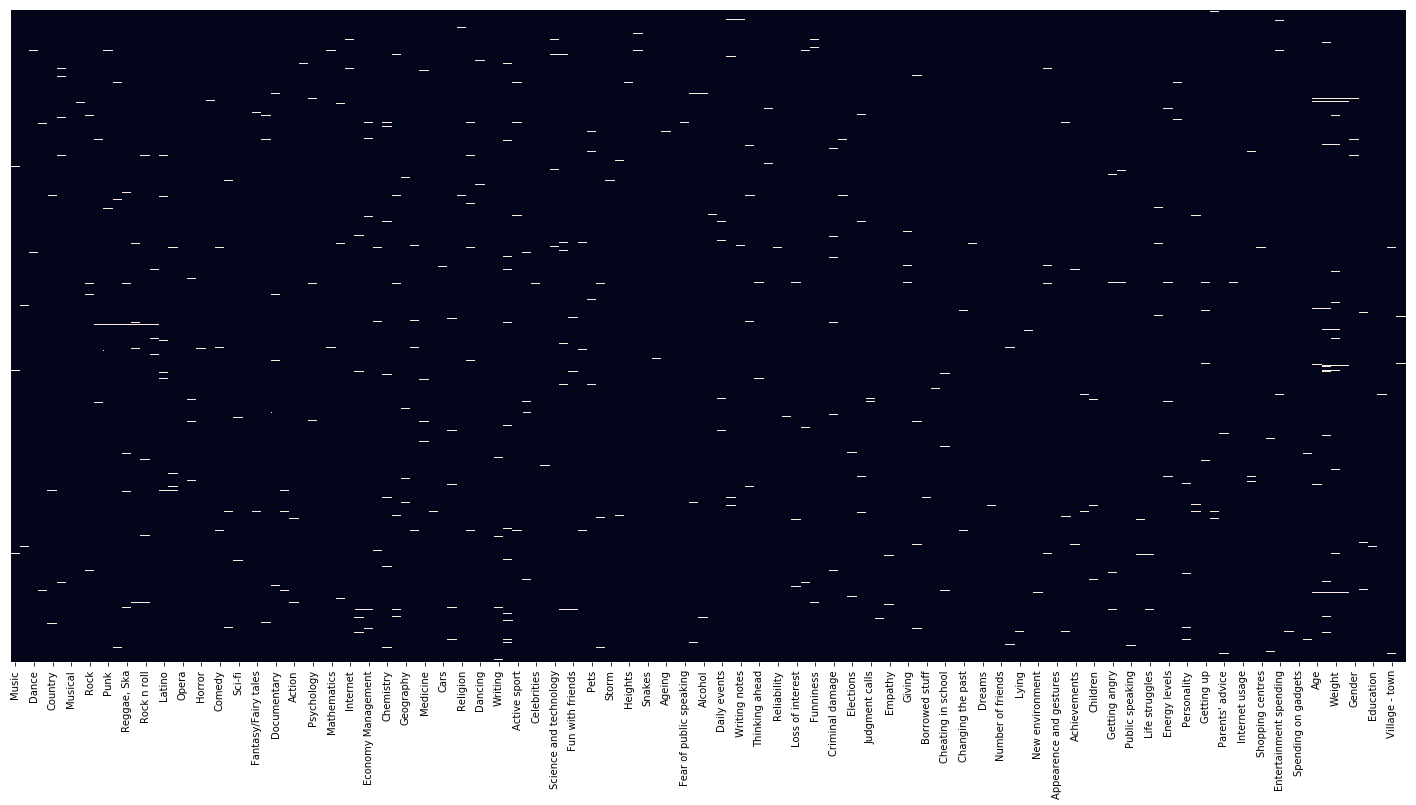

In [8]:
from matplotlib import pyplot
a4_dims = ( 25,12)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,ax=ax)

 Since this is a survey, Many people did not fill the information they might not want to share, or were not aware about. Specially hegiht and weight.
 Many data sets have null values, either because it exists or was never collected or it never existed before

# Working with target column
Lets get started with our target column. We will firs see the classification of the our target columns into its different classes.

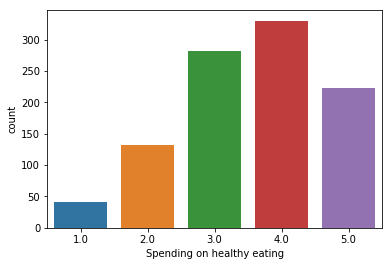

In [9]:
target='Spending on healthy eating'
# Ignoring the tupple since class label is missing
df = df[np.isfinite(df[target])]
#see data distribution of y column
sns.countplot(target,data=df)

First we will remove all the rows that are missing for our target column. This is because we cannot assume any value to our missing values in our target column by using mean median mode methods. We also see that the data distribution is skewed. It means the class distribution is imbalanced. So the model will always try to predict the most frequent class. This inturn reduces the accuracy. In order that our model predicts better. We will do oversampling. Oversampling using SMOTE helps in randomy sampling the class data which are in minority. oversampling is usually done only to the training data.

# Handling with categorical columns
Its now time to handle categorical data. Categorical data cannot be handled by the machine learning models. Machine learning models only deals with numeric data. Thus we need to convert our categorical data to numeric data. Either we can drop those columns or we can use one hot encoding. I used one hot encoding by making dummies of categorical columns.

In [10]:
df2 = pd.get_dummies(df, columns=['Smoking', 'Alcohol','Punctuality', 'Lying','Internet usage','Gender', 'Left - right handed', 'Education', 'Only child', 'Village - town', 'House - block of flats'])
#df2=df.drop(['Smoking', 'Alcohol','Punctuality', 'Lying','Internet usage','Gender', 'Left - right handed', 'Education', 'Only child', 'Village - town', 'House - block of flats'],axis=1)

# Outliers detection and Handling

Outliers are the data point which act as an error or noise in the data. They are caused by various reason like false reading, faulty machine, or mistakes done while filling data. Outlier can cause serious problems in the data and can affect the performance of the model. Therefore it is very necessary for us to either smooth the noisy data. Outliers can be univariate and multivariate. Various methods are binning, boundary detection etc.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1005 entries, 0 to 1009
Columns: 173 entries, Music to House - block of flats_house/bungalow
dtypes: float64(134), int64(5), uint8(34)
memory usage: 1.1 MB


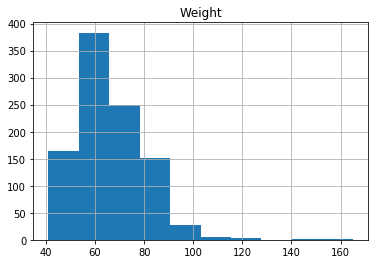

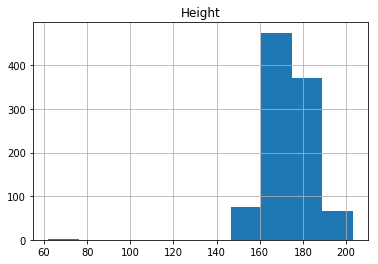

In [11]:
df2.hist('Weight')
df2[df.Weight.iloc[:]>140]
#rows 885 992
df2.hist('Height')
df2[df.Height.iloc[:]<130]
# rows 676
#df.iloc[[1,2,3,100]]
df2.drop(df.index[[885,992,676]],axis=0,inplace=True)
df2.info()

We notice that most of the data is between 1 to 5 so there are no outlier in those columns. Only issues were age, weight and height.<br>
We handle those outliers by removing them.<br><br>
# Filling Missing values
<br> Missing  values can be filled using Mean, Median, Mode. We will use median for filling the data because most of the data are natural numbers and not whole numbers. Mean will make them whole numbers. Also this approach can provide better estimates both of the underlying relations among the variables and of the reliability of your estimates.

In [12]:
df2.fillna(df2.median(),inplace=True)
#df2.fillna(df2.mean(),inplace=True)
#df2 = df2.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [13]:
df2.shape

(1005, 173)

# STEP 2 : DATA ANALYSIS

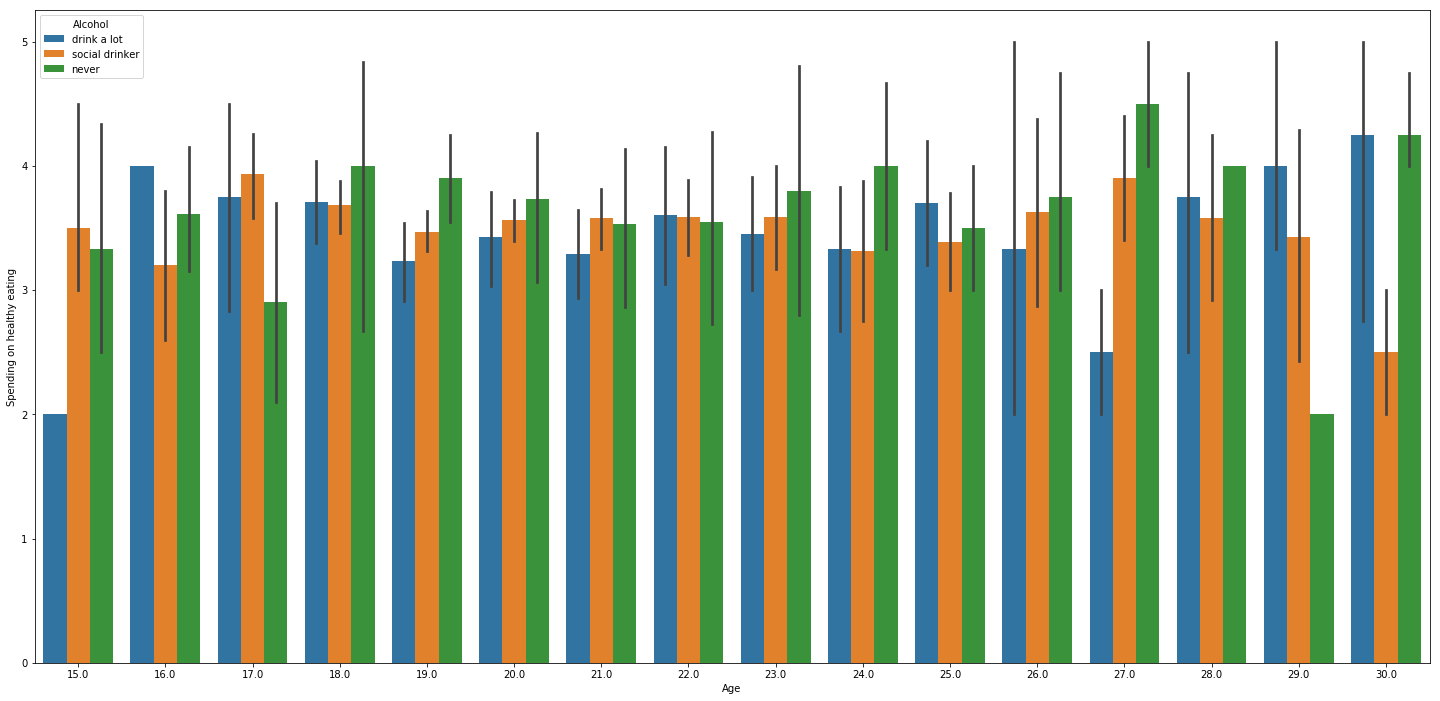

In [14]:
a4_dims = ( 25,12)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.barplot(df['Age'],df[target],df['Alcohol'],ax=ax)

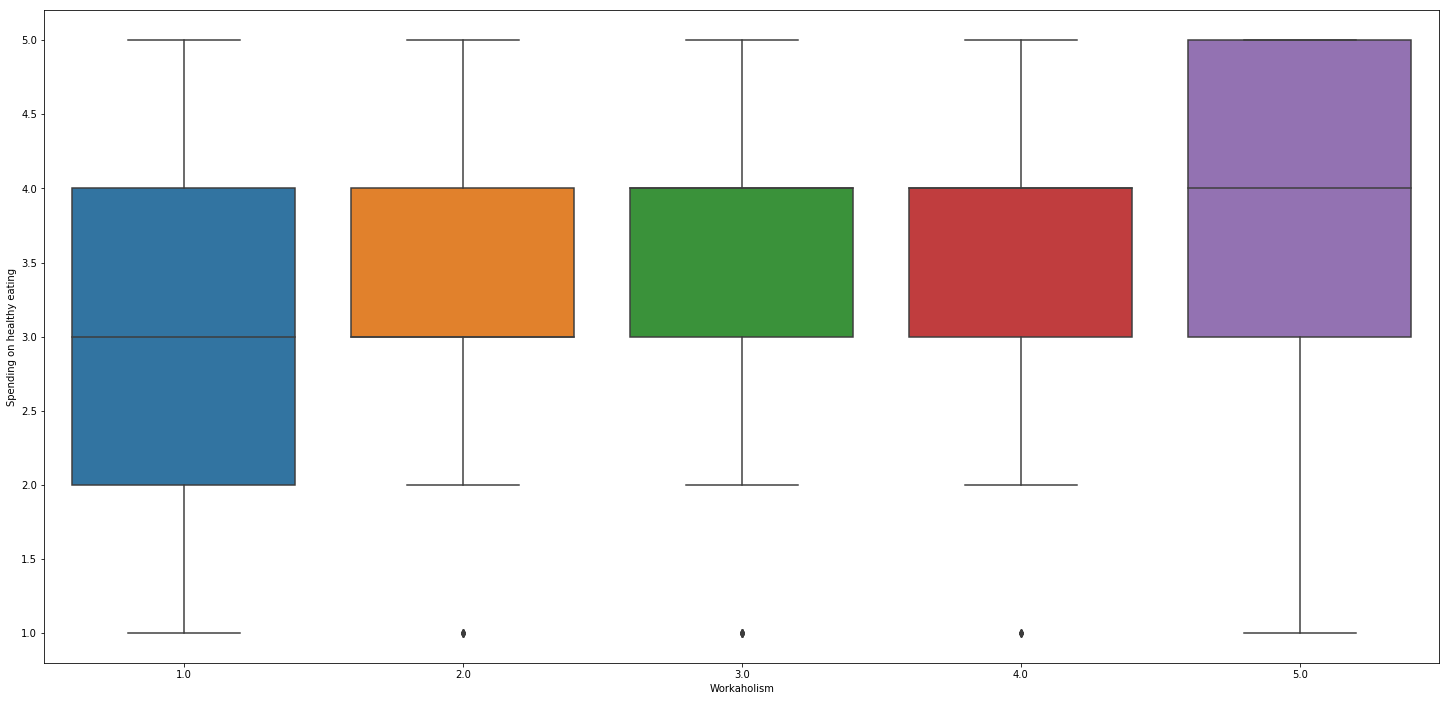

In [15]:
a4_dims = ( 25,12)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.boxplot(df['Workaholism'],df[target],ax=ax)

# Seperate the data into x and y
we do this to specify our target column to machine learning algorithms

In [16]:
X=df2.drop(target,axis=1)
y=df2[target]

# Split Data into train/dev/test data
Models are run on training data to train it. Its hyperparameters are tuned with dev data and then finally its accuracy is tested on test data

In [17]:
def CreateSplits(X,y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=101)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20,random_state=101)
    return X_train,y_train,X_val,y_val,X_test,y_test

# Data transformation
We transform data using scaling and standardization. We do scaling so that we do not have too much difference gap between columns range. Different techniques of scaling are standard scaling and min_max scaling.

In [18]:
scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)
pd.DataFrame(scaled_data).head()

,0,1,2,3,4,5,6,7,8,9,...,162,163,164,165,166,167,168,169,170,171
0,0.404438,-0.390816,-0.951996,-1.134064,-0.114316,-0.764990,-1.399903,1.315908,1.049339,-0.989516,...,-0.070711,-0.296078,-0.294086,-1.263685,0.581563,-0.578499,-1.525718,1.540287,0.835246,-0.828397
1,-1.100971,0.810315,-0.951996,-1.134064,-1.048359,-1.565839,-0.605043,-0.410577,1.049339,1.204154,...,-0.070711,-0.296078,-0.294086,-1.263685,0.581563,-0.578499,0.655429,-0.649230,0.835246,-0.828397
2,0.404438,2.011446,-0.951996,-0.252599,0.819727,0.836708,1.779538,-0.410577,1.049339,0.472931,...,-0.070711,-0.296078,-0.294086,0.791337,0.581563,-0.578499,0.655429,-0.649230,0.835246,-0.828397
3,0.404438,-0.390816,-0.951996,-1.134064,-1.048359,-1.565839,-1.399903,-1.273820,-1.491831,-0.989516,...,-0.070711,-0.296078,-0.294086,-1.263685,-1.719504,1.728611,0.655429,-0.649230,-1.197253,1.207151
4,0.404438,-0.390816,0.759553,0.628866,-0.114316,0.836708,0.189817,1.315908,-0.644775,-0.989516,...,-0.070711,-0.296078,-0.294086,0.791337,0.581563,-0.578499,-1.525718,1.540287,-1.197253,1.207151


In [19]:

X_train,y_train,X_val,y_val,X_test,y_test=CreateSplits(scaled_data,y)
rfc = RandomForestClassifier(n_estimators=130)
rfc.fit(X_train, y_train)
rfc_pred=rfc.predict(X_val)
print("Accuracy on validation Set using Scaling")
print(np.mean(y_val==rfc_pred))
rfc_pred = rfc.predict(X_test)
print("Accuracy on test Set using Scaling")
print(np.mean(y_test==rfc_pred))

Accuracy on validation Set using Scaling
0.409937888199
Accuracy on test Set using Scaling
0.353233830846


# PCA
We see that scaling did not give us a sufficient accuracy. May be its because we have too many dimensions and reduandant features can cause us to reduce accuracy. Hence we can try PCA to give us less features which will represent as accurate to the real data.

In [20]:
pca = PCA(n_components=7)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
x_pca.shape
X_train,y_train,X_val,y_val,X_test,y_test=CreateSplits(scaled_data,y)
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=140)
rfc.fit(X_train, y_train)
rfc_pred=rfc.predict(X_val)
print("Accuracy on validation Set using PCA")
print(np.mean(y_val==rfc_pred))
rfc_pred = rfc.predict(X_test)
print("Accuracy on test Set using PCA")
print(np.mean(y_test==rfc_pred))


Accuracy on validation Set using PCA
0.409937888199
Accuracy on test Set using PCA
0.363184079602


# SVM with PCA

In [21]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['linear','poly']} 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=0)
grid.fit(X_train,y_train)
grid_predictions = grid.predict(X_val)
print("Accuracy on validation Set using PCA")
print(np.mean(y_val==grid_predictions))
grid_predictions = grid.predict(X_test)
print("Accuracy on test Set using PCA")
print(np.mean(y_test==grid_predictions))


Accuracy on validation Set using PCA
0.32298136646
Accuracy on test Set using PCA
0.293532338308


# Visual analysis of pca components

Text(0,0.5,'Second Principal Component')

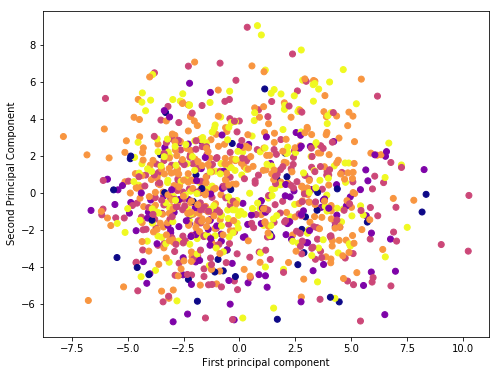

In [22]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=y,cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

After trying various component values, the model did not perform better. However there was minor improvement.
# Now lets try and check other baseline models without pca

In [23]:
def over_sample(train_vectors, train_class):
    sm = SMOTE(random_state=42)
    train_vectors, train_class = sm.fit_sample(train_vectors, train_class)
    return train_vectors, train_class        


# KNN

In [24]:
def KNN(X,y):
    max_i=0
    max_acc=0
    max_cols=0
    for cols in np.arange(5,35):
        X_new = SelectKBest( k=cols).fit_transform(X, y)
        X_train,y_train,X_val,y_val,X_test,y_test=CreateSplits(X_new,y)
        X_train, y_train = over_sample(X_train, y_train)
        for i in range(7,41):
            knn = KNeighborsClassifier(n_neighbors=i,weights='distance')
            knn.fit(X_train,y_train)
            pred_i = knn.predict(X_val)
            if (max_acc<np.mean(y_val==pred_i)):
                    max_i=i
                    max_cols=cols
                    max_acc=np.mean(y_val==pred_i)
    knn = KNeighborsClassifier(n_neighbors=max_i,weights='distance')
    X_new = SelectKBest( k=max_cols).fit_transform(X, y)
    X_train,y_train,X_val,y_val,X_test,y_test=CreateSplits(X_new,y)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_val)
    print("Best accuracy of KNN on validation:")
    print(np.mean(y_val==pred_i))
    print("Accuracy of KNN on test ")
    pred_i = knn.predict(X_test)
    print(np.mean(y_test==pred_i))    
KNN(X,y)        

Best accuracy of KNN on validation:
0.347826086957
Accuracy of KNN on test 
0.348258706468


# Decision Tree

In [25]:
def decision_tree(X_train,y_train,X_val,y_val,X_test,y_test):
    max_i=0
    max_acc=0
    max_j=0
    _,col=X_train.shape
    for i in np.arange(10,30):
        for j in np.arange(1,40):
            dtree = DecisionTreeClassifier(max_features=i,max_depth=j)
            dtree.fit(X_train,y_train)
            predictions = dtree.predict(X_val)
            if (max_acc<np.mean(y_val==predictions)):
                max_i=i
                max_j=j
                max_acc=np.mean(y_val==predictions)
    dtree = DecisionTreeClassifier(max_features=max_i,max_depth=max_j)
    dtree.fit(X_train,y_train)
    predictions = dtree.predict(X_val)
    print("Accuracy of Decision Tree on validation:")
    print(np.mean(y_val==predictions))
    predictions = dtree.predict(X_test)
    print("Accuracy of Decision Tree on test:")
    print(np.mean(y_test==predictions))
X_train,y_train,X_val,y_val,X_test,y_test=CreateSplits(X,y)
decision_tree(X_train,y_train,X_val,y_val,X_test,y_test)

Accuracy of Decision Tree on validation:
0.298136645963
Accuracy of Decision Tree on test:
0.268656716418


# Multilayer Perceptron with gridsearch

In [33]:
def MLP(X_train,y_train,X_val,y_val,X_test,y_test):
    gs = GridSearchCV(MLPClassifier(), param_grid={
    'solver' : ['lbfgs', 'sgd', 'adam'],
    'alpha': [0.00001,0.0001,0.001,0.01,0.01],
    'hidden_layer_sizes':[(15, 25)],
    'random_state': [1]
            })
    gs.fit(X_train, y_train)
    grid_predictions = gs.predict(X_val)
    print("Accuracy for MLP on validation :")
    print(np.mean(y_val==grid_predictions))
    grid_predictions = gs.predict(X_test)
    print("Accuracy for MLP on test :")
    print(np.mean(y_test==grid_predictions))
X_train,y_train,X_val,y_val,X_test,y_test=CreateSplits(X,y)
MLP(X_train,y_train,X_val,y_val,X_test,y_test)    

Accuracy for MLP on validation :
0.335403726708
Accuracy for MLP on test :
0.258706467662


# SVM with GridSearch

In [27]:
X_train,y_train,X_val,y_val,X_test,y_test=CreateSplits(X,y)
model = SVC()
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(model,param_grid,refit=True,verbose=0)
grid.fit(X_train,y_train)
print("Accuracy for SVM on validation")
grid_predictions = grid.predict(X_val)
print(np.mean(y_val==grid_predictions))
print("Accuracy for SVM on test")
grid_predictions = grid.predict(X_test)
print(np.mean(y_test==grid_predictions))



Accuracy for SVM on validation
0.335403726708
Accuracy for SVM on test
0.34328358209


# My model using ensembling technique

In [32]:
def my_model(X,y):
    print("Runnig my_model-------")
    rows,col=X.shape
    clf1 = ExtraTreesClassifier(n_estimators=80, max_depth=None,min_samples_split=2)
    clf2 = RandomForestClassifier(n_estimators=250, max_depth=None,random_state=101)
    clf3 = AdaBoostClassifier(n_estimators=80)
    clf4 = GradientBoostingClassifier(n_estimators=180, learning_rate=1.0,max_depth=1)
    clf5 = RandomForestClassifier(random_state=1)
    clf8 = ExtraTreesClassifier(n_estimators=80, max_depth=None,min_samples_split=2)
    clf6 = GaussianNB()
    clf7 = SVC(kernel='rbf', probability=True)
    clf10 = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=7)
    clf8 = SVC(kernel='poly',probability=True)
    clf9 = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)

    max_acc=0
    max_i=0
    print("Training model and tuning hyperparameters")
    for i in np.arange(64,67):
        X_new = SelectKBest( k=i).fit_transform(X, y)
        X_train,y_train,X_val,y_val,X_test,y_test=CreateSplits(X_new,y)
        eclf = VotingClassifier(estimators=[('et', clf1), ('rfc', clf2), ('ab', clf3),('gb', clf4),('rfc1', clf5),('gnb', clf6),('svc',clf7),('svc1',clf8),('mlp',clf9),('bc',clf10)], voting='soft')
        eclf = eclf.fit(X_train,y_train)
        pred=eclf.predict(X_val)
           
        if(max_acc<np.mean(y_val==pred)):
            max_acc=np.mean(y_val==pred)
            max_i=i
    print("Best features selected now check test set")    
    X_new = SelectKBest( k=max_i).fit_transform(X, y)
    X_train,y_train,X_val,y_val,X_test,y_test=CreateSplits(X_new,y)
    eclf = VotingClassifier(estimators=[('et', clf1), ('rfc', clf2), ('ab', clf3),('ab1', clf3),('gb', clf4),('rfc1', clf5),('gnb', clf6),('svc',clf7),('svc1',clf8),('svc3',clf8),('mlp',clf9),('bc',clf10)], voting='soft')
    eclf = eclf.fit(X_train,y_train)
    pred=eclf.predict(X_test)
    print("Accuracy for my_model")
    print(np.mean(pred==y_test))
my_model(X,y)

Runnig my_model-------
Training model and tuning hyperparameters
Best features selected now check test set
Accuracy for my_model
0.402985074627


# Results
After using ensembling technique, the overall accuracy increases. This is because different model gives their own predicition and max prediction becomes actual prediction